# Introduction to Scikit-Learn and PCA
## Data Science Tools I
### Terron Ishihara and Don Dalton | University of Denver


---

Reference: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) (commonly imported as `sklearn`) is a Python library with an abundance of tools for predictive data analysis. It is widely used for a number of reasons, but here are a few:

> **Consistency**: All objects share a common interface drawn from a limited set of methods. Once you've used one, you can use them all.

> **Limited Object Hierarchy**: Algorithms are represented by Python classes. Datasets are represented using NumPy arrays, Pandas data frames, etc.

> **Composition**: It is easy to define a sequence of transformations to better automate the processing pipeline.

## Available Datasets

Scikit-learn comes with a number of commonly used datasets for basic ML applications. Although scikit-learn is compatible with Pandas data structures, the standard form of input and output for scikit-learn's models is NumPy arrays.

In [32]:
from sklearn import datasets

dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

Let's load one of them to see how the data is arranged. Each `load_<name>` method will return an object containing the data itself, the target values, the target label names, and the feature names. Target values are used as labels in supervised learning, whereas unsupervised learning methods would not make use of these labels.

In [33]:
bc = datasets.load_breast_cancer()
X = bc.data # The data frame of observed samples and their features is conventionally called X
y = bc.target # The target labels are conventionally called y

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [34]:
print(bc.feature_names)
print(bc.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [35]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## API

The steps mostly commonly followed when using scikit-learn are:

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the model to new data
  * For supervised learning, often we predict labels for unknown data using the `predict()` method.
  * For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Generating Example Data

The `datasets` package also makes it easy to generate randomized data for practice or to test ideas. These manifest as methods with names `make_<name>`.

To start, let's make blobs to demonstrate a simple classification problem.


[0 1 0 2 2]


C:\Users\donda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


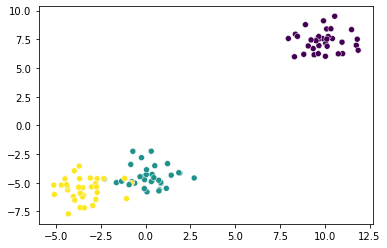

In [36]:
np.random.seed(2020) # Seed makes it so random values are the same each run

# make_blobs creates data points that are clustered around center points
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=3)

# The c parameter is like hue, but for an entire label array
# rather than a named column from a data frame.
sns.scatterplot(X[:,0], X[:,1], c=y)
print(y[0:5]) # Check what the "labels" are

## Example: Classification

We can now follow each step of the usual process to demonstrate how we would go about classifying this dummy data.

First we choose a model. Without any prior knowledge of what models are available, we cannot reasonably pull one out of thin air. Here we use a Gaussian Naive Bayes classifier, which is one of the simplest classifiers available.

After importing the chosen model, we instantiate it as an instance of the `GaussianNB` object.

Then we fit the model to our data. Since this is a classifier, it requires $X$ and its corresponding labels $y$. If we were using train and test partitions, the `fit()` method would be given the train data $X$ and $y$.

Lastly, we make our predictions using `predict` since this is a supervised learning algorithm.

In [37]:
from sklearn.naive_bayes import GaussianNB # 1. Choose model

model = GaussianNB() # 2. Instantiate model object
model.fit(X, y) # 3. Fit the model to the data
y_predict = model.predict(X) # 4. Predict labels with fitted model

To observe the results, we can plot the original data colored by its predicted labels.

<AxesSubplot:>

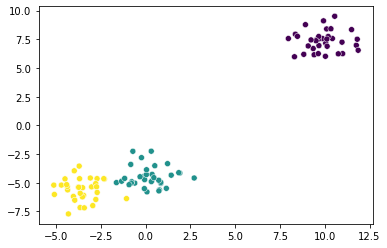

In [38]:
sns.scatterplot(x=X[:,0], y=X[:,1], c=y_predict)

To see how many labels the classifier got correct, we can calculate the accuracy score. This is formulated as `num_correct_labels / num_labels`.

There are actually a number of different means of measuring the performance of a model's prediction, a common one being its [F-score](https://en.wikipedia.org/wiki/F-score) for binary classification.

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_predict)

0.97

Not bad! But this should not come as a surprise. The model was fitted using *all* of the data in $X$. In other words, the model has already "seen" every data point. Having it predict labels it used to fit the model in the first place is not demonstrative of the algorithm's ability to predict labels more generally, for unseen data points.

This gets at the idea of **cross validation**, which will be covered later.

## Example: Regression

The `make_regression` method can be used to generate these points, but the results tend to be more "cloud-like" than with an obvious trend, so here we generate the points manually.

<AxesSubplot:>

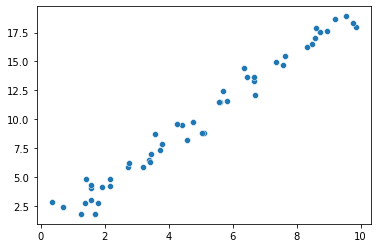

In [40]:
# RandomState stores a number of different random number generator methods
rng = np.random.RandomState(2020) # seed 2020

# Get 50 random x-values in rand [0,10]
x = 10 * rng.rand(50)
# Get y based on linear model dependent on x
noise = 50 # We don't want a perfect line, so add some noise
slope = 2 # m
bias = 0 # b
y = slope * x + bias + rng.randn(noise)

sns.scatterplot(x=x, y=y)

Following the same steps as before, we import a LinearRegression model, similar to what we have seen before but now using scikit-learn's version.

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Since the x array is essentially 1 "row" and 50 "columns",
# we have to reshape it so that it is 50 rows and 1 column
# to match the expected shape for these models
X = x.reshape(len(x), 1)
model.fit(X, y)

LinearRegression()

We can see what the resulting model learned by checking its parameters. Model parameters that are learned during the `fit()` stage are named using a trailing underscore.

In [42]:
model.coef_

array([1.90036477])

In [43]:
model.intercept_

0.5875829742246967

Since this is a linear regression model, we can display the model as a line by predicting the y for equally spaced points along the plot's overall range.

<AxesSubplot:>

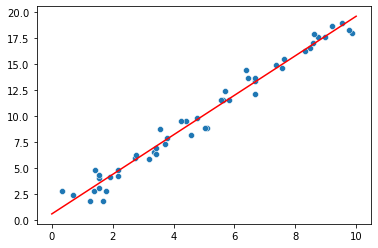

In [44]:
x_fit = np.linspace(0, 10)
X_fit = x_fit.reshape(len(x_fit), 1)
y_fit = model.predict(X_fit)

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x_fit, y=y_fit, color='red')

# Principal Component Analysis

For more of the theoretical details on PCA, check out the corresponding [slides](https://docs.google.com/presentation/d/1uR0gA33kBDwzoURFmBwuliZk8A4RCTtotVKTvfZpjLQ/edit?usp=sharing).


For this example, we'll use a real dataset often used for simple classification demos. This is the classic [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) by Ronald Fisher in 1936. The dataset contains 50 samples of 3 species of Iris flowers with very simple features regarding the length and width of the [sepals](https://en.wikipedia.org/wiki/Sepal) and petals.

In [45]:
# We can get this dataset from scikit-learn too, but here we get it from Seaborn
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Seaborn's `pairplot` can be used to observe relationships between each possible pair of features. The diagonal of the subplots pairs features with themselves, in which case a distribution plot is made showing the marginal distribution of that feature for each label.

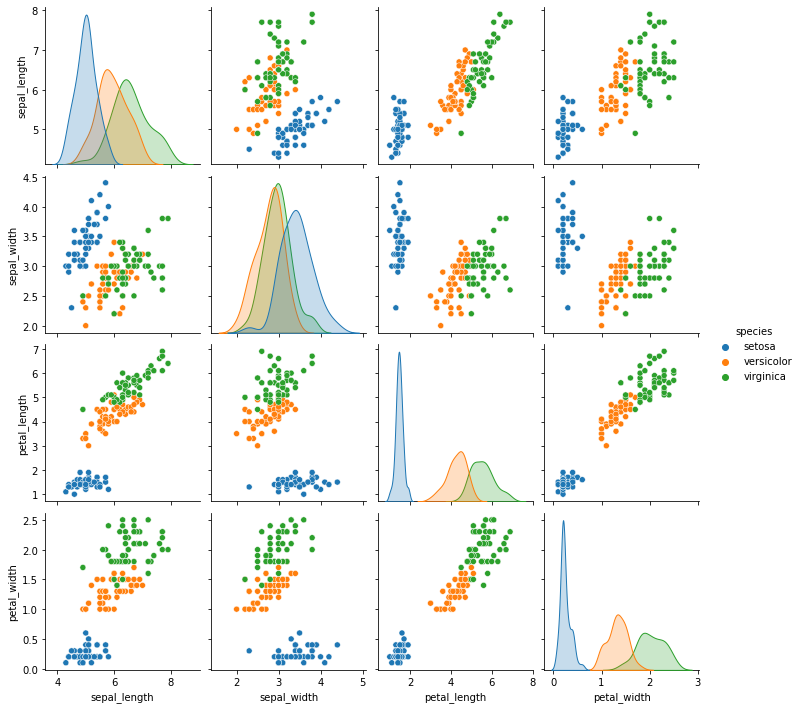

In [46]:
sns.pairplot(iris, hue='species');

To be able to apply PCA to this dataset, we have to isolate $X$ and $y$ from the imported dataset.

In [47]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(X_iris.head())
print(y_iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Now we perform PCA to reduce the dimensionality of the dataset from 4 (because there are 4 features) to 2. 

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_iris)

PCA(n_components=2)

Here we see that `pca.components_` contains 2 arrays (vectors) of length 4. There are 2 vectors because we specified that we wanted 2 principal components. They are of length 4 because there are 4 features that the components are weighting in a linear combination. 

In [49]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Explained variance is the amount of variance of the original data that is maintained by each component. You can get this as raw values or as normalized ratios, as we do here. One component is notably more significant than the other.

In [50]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

With the model fitted ("learned"), we can transform the data and observe that the dimensionality has been reduced.

This `transform` step is missing from the classification and regression examples because PCA is an unsupervised learning algorithm. We aren't predicting values here, rather we are processing the data so it can be interpreted in a different way.

In [51]:
X_pca = pca.transform(X_iris)

print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")

Original shape: (50, 1)
Transformed shape: (150, 2)


Plot the results.

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

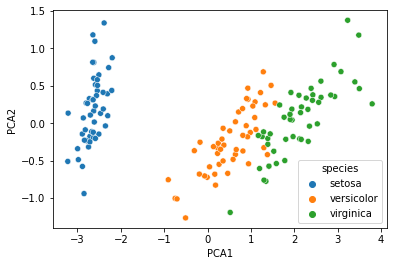

In [52]:
pca_df = pd.DataFrame()
pca_df['PCA1'] = X_pca[:,0]
pca_df['PCA2'] = X_pca[:,1]
pca_df['species'] = y_iris
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='species')

PCA alone does not perform any predictions. What it does allow us to do is observe relationships between the labeled data. For example, the `setosa` data points are clearly distinguishable from the other two, while a classification model may have some trouble separating `versicolor` and `virginica`.

### Food data
Find the first two principal components for each data point.  Then we find the weight vectors w1 and w2.  The first plot is the weight vectors.

In [53]:
df = pd.read_csv('./food-consumption.csv')
print(df.head())

   Country  Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
0  Germany           90              49   88         19        57   
1    Italy           82              10   60          2        55   
2   France           88              42   63          4        76   
3  Holland           96              62   98         32        62   
4  Belgium           94              38   48         11        74   

   Powder soup  Tin soup  Potatoes  Frozen fish  ...  Apples  Oranges  \
0           51        19        21           27  ...      81       75   
1           41         3         2            4  ...      67       71   
2           53        11        23           11  ...      87       84   
3           67        43         7           14  ...      83       89   
4           37        23         9           13  ...      76       76   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74       30   
1   

Text(0.5, 1.0, 'pc plot for each food')

<Figure size 432x288 with 0 Axes>

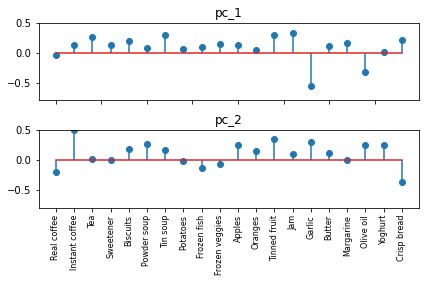

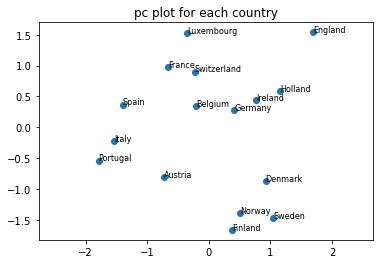

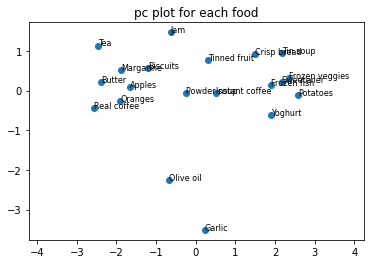

In [55]:
import numpy as np
from matplotlib import pyplot as plt
import csv

raw = []
with open('./food-consumption.csv', newline='') as file:
    filereader = csv.reader(file, delimiter=',')
    header = next(filereader)
    for row in filereader:
        raw.append(row)
        
raw = np.array(raw)

countrynames = raw[:,0]
foodnames = np.array(header)[1:]
data = raw[:,1:].astype(float)
m,n = np.shape(data)

# part 1 find the weight vectors
k=2
mu = np.mean(data, axis=0)
demean = data - np.tile(mu, [m, 1])
C = demean.T @ demean/m

# s, u = np.linalg.eigh(C)
# s = np.flip(s)
# u = np.flip(u, 1)

u, s, _ = np.linalg.svd(C)  # singular vector decomposition

plt.figure()
xx= np.arange(0,n, 1)

fig1, ax1 = plt.subplots(nrows=2, ncols=1)

ax11 = plt.subplot(2,1,1)
plt.stem(xx, u[:,0], use_line_collection=True)  # stemplot the weight vectors
plt.ylim([-0.8,0.5])
plt.title('pc_1')

ax12 = plt.subplot(2,1,2)
plt.stem(xx, u[:,1], use_line_collection=True)
plt.title('pc_2')
plt.ylim([-0.8,0.5])
plt.xticks(xx,foodnames, rotation=90, fontsize = 8)

ax11.get_shared_x_axes().join(ax11, ax12)
ax11.set_xticklabels([])

fig1.tight_layout(pad=1)
    
# Part two, find the first two principal components  and draw a scatter plot of the 2D representations

pc = demean @ u[:,:k] @ np.diag((1/np.sqrt(s[0:k])))
plt.figure()
plt.scatter(pc[:,0], pc[:,1])
plt.axis('equal')
for ii, txt in enumerate(countrynames):
    plt.annotate(txt, (pc[ii, 0], pc[ii, 1]),fontsize=8)
plt.title('pc plot for each country')      
    
    
# Part 3, plot first two principal components on the data by treating country consumptions as
# a feature vector for each food item.
data1 = data.T
mu1 = np.mean(data1, axis=0)
demean1 = data1 - np.tile(mu1, [n, 1])
C1 = demean1.T @ demean1/n

u1, s1, _ = np.linalg.svd(C1)

pc1 = demean1 @ u1[:,:k] @ np.diag((1/np.sqrt(s[0:k])))
plt.figure()
plt.scatter(pc1[:,0], pc1[:,1])
plt.axis('equal')
for ii, txt in enumerate(foodnames):
    plt.annotate(txt, (pc1[ii, 0], pc1[ii, 1]), fontsize=8)
plt.title('pc plot for each food')    

### Eigenfaces

This is a simple illustration of using PCA for face recognition.  First, we downsample images to speed processing.  Given a set of images for each person, we generate the eigenface using these images.
You will treat one picture from the same person as one data point for that person. Note that
you will first vectorize each image, which was originally a matrix. Thus, the data matrix
(for each person) is a matrix; each row is a vectorized picture. You will find weight vectors
to combine the pictures to extract different "eigenfaces" that correspond to that person's
pictures' first few principal components.

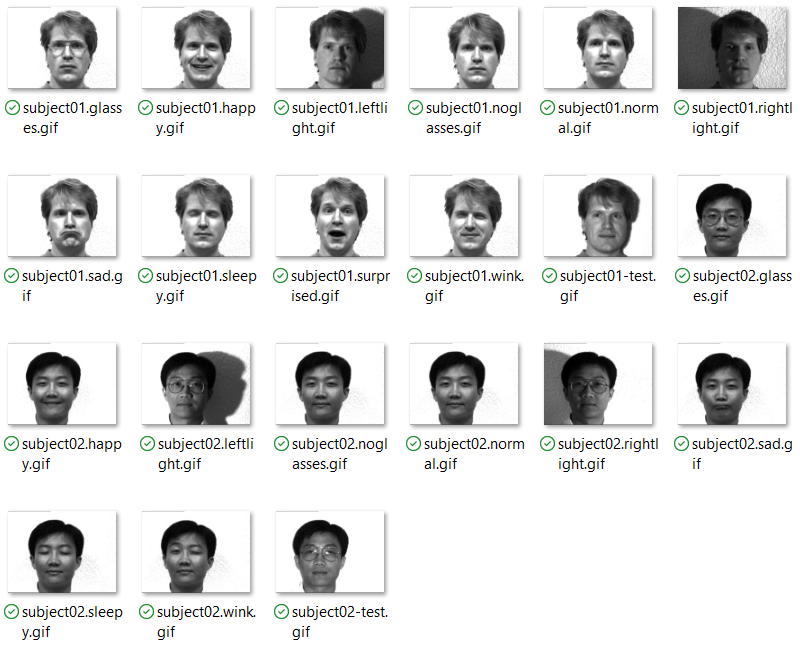

s11 = -0.867
s12 = -0.6904
s21 = -0.0831
s22 = -0.4053


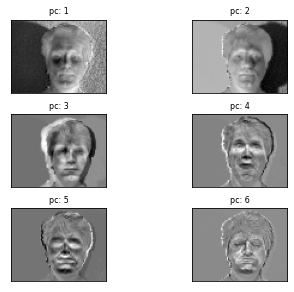

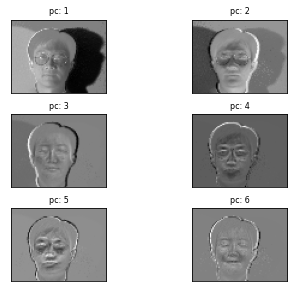

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read in the images
datadir = './yalefaces/'

# 
im = np.asanyarray(Image.open(datadir+'subject01-test.gif'))
nrow_0, ncol_0 = np.shape(im)  # the original resolution
nrow = int(np.ceil(nrow_0/4.))  # resolution after downsampleing
ncol = int(np.ceil(ncol_0/4.))

s01 = np.empty( (0, nrow*ncol) )
s02 = np.empty( (0, nrow*ncol) )

for f in os.listdir(datadir):
    if f.endswith('.gif'):
        # downsample by 4 when reading-in the image
        im = np.asarray(Image.open(datadir + f))[::4, ::4].reshape(1, -1)

        if f.startswith('subject01'):
            if f.endswith('test.gif'):
                s01_test = im
            else:
                s01 = np.row_stack( (s01, im) )

        elif f.startswith('subject02'):
            if f.endswith('test.gif'):
                s02_test = im
            else:
                s02 = np.row_stack( (s02, im) )
                
        else:
            pass
        
mu01 = np.mean(s01, 0)
mu01 = mu01[np.newaxis,:] 
mu02 = np.mean(s02, 0)
mu02 = mu02[np.newaxis,:]

# subtract mean
x01 = s01-np.tile(mu01, (10, 1))
x02 = s02-np.tile(mu02, (9, 1))

c01 = x01 @ x01.T
c02 = x02 @ x02.T

u01,d01,_ = np.linalg.svd(c01)
u02,d02,_ = np.linalg.svd(c02)

# compute the eigface, data*U, where data:p-by-m, U:m-by-k, k=6 is the selection number
eface01 = u01[:,0:6].T @ s01
eface02 = u02[:,0:6].T @ s02

# subject01
fig1, ax1 = plt.subplots(3,2)
tmp = []
for ii in range(3):
    for jj in range(2):
        tmp.append(ii*2+jj)
        ax1[ii][jj].imshow(np.reshape(eface01[ii*2+jj,:], (nrow,ncol)), cmap='gray')
        ax1[ii][jj].xaxis.set_visible(False)
        ax1[ii][jj].yaxis.set_visible(False)
        ax1[ii][jj].set_title('pc: '+str(ii*2+jj+1), fontsize=8)
fig1.tight_layout(pad=0.5)  

# subject02
fig2, ax2 = plt.subplots(3,2)
tmp = []
for ii in range(3):
    for jj in range(2):
        flag = ii*2+jj
        tmp.append(flag)
        ax2[ii][jj].imshow(np.reshape(eface02[flag,:], (nrow,ncol)), cmap='gray')
        ax2[ii][jj].xaxis.set_visible(False)
        ax2[ii][jj].yaxis.set_visible(False)
        ax2[ii][jj].set_title('pc: '+str(flag+1), fontsize=8)
fig2.tight_layout(pad=0.5)  

# Q3-2 projection score
# s_ij, i:eface, j:test

s11 = s01_test @ eface01[0,:] / \
    (np.linalg.norm(s01_test) * np.linalg.norm(eface01[0,:]))
s12 = s02_test @ eface01[0,:] / \
    (np.linalg.norm(s02_test) * np.linalg.norm(eface01[0,:]))
s21 = s01_test @ eface02[0,:] / \
    (np.linalg.norm(s01_test) * np.linalg.norm(eface02[0,:]))
s22 = s02_test @ eface02[0,:] / \
    (np.linalg.norm(s02_test) * np.linalg.norm(eface02[0,:]))    

print('s11 = {}'.format(str(np.round(s11[0],4))))
print('s12 = {}'.format(str(np.round(s12[0],4))))
print('s21 = {}'.format(str(np.round(s21[0],4))))
print('s22 = {}'.format(str(np.round(s22[0],4))))